In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
## set random seeds
import numpy as np
np.random.seed(10)

In [2]:
import tensorflow as tf

In [3]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.

It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
import os

batch_size = 1000
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
print(x_train.shape[1:])
print(type(x_train))

(32, 32, 3)
<class 'numpy.ndarray'>


In [5]:
import numpy as np

In [6]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = np.expand_dims(gray, axis=3)
    print(gray.shape)
    return gray

In [7]:
x_train=rgb2gray(x_train)
x_test=rgb2gray(x_test)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [8]:
print(x_train[0].shape)

(32, 32, 1)


In [9]:
print(x_test.shape)

(10000, 32, 32, 1)


In [10]:
model = Sequential()
model.add(Convolution2D(6, (5, 5), padding='valid', data_format="channels_last", input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))   
model.add(Convolution2D(16, (5, 5), padding='valid', data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
y_test.shape[1]

10

In [12]:
# initiate RMSprop optimizer
sgd = SGD(lr=0.1, decay=0, momentum=0.5, nesterov=False)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['categorical_crossentropy', 'accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
type(x_train)

numpy.ndarray

In [14]:
import time
start_time = time.time()
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)
print("--- Training Time - %s seconds ---" % (time.time() - start_time))

Epoch 1/100
50/50 [==============================] - 0s 10ms/step - loss: 2.2998 - categorical_crossentropy: 2.2998 - accuracy: 0.1127 - val_loss: 2.2959 - val_categorical_crossentropy: 2.2959 - val_accuracy: 0.1223
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 2.2921 - categorical_crossentropy: 2.2921 - accuracy: 0.1388 - val_loss: 2.2875 - val_categorical_crossentropy: 2.2875 - val_accuracy: 0.1522
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 2.2807 - categorical_crossentropy: 2.2807 - accuracy: 0.1605 - val_loss: 2.2717 - val_categorical_crossentropy: 2.2717 - val_accuracy: 0.1735
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 2.2579 - categorical_crossentropy: 2.2579 - accuracy: 0.1747 - val_loss: 2.2401 - val_categorical_crossentropy: 2.2401 - val_accuracy: 0.1833
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 2.2190 - categorical_crossentropy: 2.2190 - accuracy: 0.1859 - val

In [16]:
print(history.history.keys())
from scipy.ndimage.filters import gaussian_filter1d

train_acc=gaussian_filter1d(history.history['accuracy'], sigma=0.5)
train_loss=gaussian_filter1d(history.history['loss'], sigma=0.5)
test_acc=gaussian_filter1d(history.history['val_accuracy'], sigma=0.5)
test_loss=gaussian_filter1d(history.history['val_loss'], sigma=0.5)

dict_keys(['loss', 'categorical_crossentropy', 'accuracy', 'val_loss', 'val_categorical_crossentropy', 'val_accuracy'])


Text(0.5, 1.0, 'Test Accuracy: 0.50')

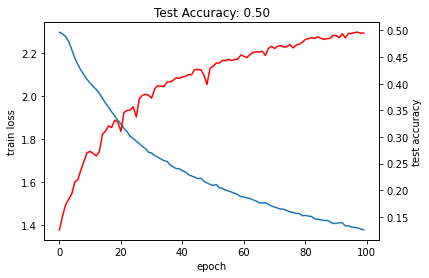

In [19]:
import matplotlib.pyplot as plt
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(epochs), train_loss)
ax2.plot(range(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('epoch')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))